<a href="https://colab.research.google.com/github/a33211/Data-science-homeworks/blob/main/Hw2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from unicodedata import normalize

# **Необхідно виконати:**

- Вивести перші рядки таблиці за допомогою методу head
- Визначте кількість рядків та стовпців у датафреймі (атрибут shape)
- Замініть у таблиці значення "—" на значення NaN
- Визначте типи всіх стовпців за допомогою dataframe.dtypes
- Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"
- Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)
- Видаліть з таблиці дані по всій країні, останній рядок таблиці
- Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)
- Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні
- У якому регіоні була найвища народжуваність у 2014 році?
- Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році

In [4]:
init = pd.read_html("https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8#%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C", match = "Коефіцієнт народжуваності в регіонах України")
init_pd = init[0]
print('Type of init\n', type(init))
print('Type of init_pd\n', type(init_pd))

Type of init
 <class 'list'>
Type of init_pd
 <class 'pandas.core.frame.DataFrame'>


In [5]:
# Вивести перші рядки таблиці за допомогою методу head
init_pd.head(3)

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,—,—
1,Вінницька,224.0,192.0,142.0,124,84,112,109,76
2,Волинська,247.0,250.0,179.0,153,112,148,141,101


In [6]:
# Визначте кількість рядків та стовпців у датафреймі (атрибут shape)
init_pd.shape

(28, 9)

In [22]:
# Замініть у таблиці значення "—" на значення NaN
pd_replaced = init_pd.replace(to_replace = "—", value = np.NaN)
print(pd_replaced)

               Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0                Крим  230.0  206.0  160.0   130    73   126  NaN  NaN
1           Вінницька  224.0  192.0  142.0   124    84   112  109   76
2           Волинська  247.0  250.0  179.0   153   112   148  141  101
3    Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4            Донецька  271.0  214.0  140.0   109    61    98   82  NaN
5         Житомирська  261.0  223.0  159.0   129    89   122  120   79
6        Закарпатська  314.0  273.0  207.0   168   115   151  146  104
7          Запорізька  219.0  197.0  150.0   124    71   106  106   68
8   Івано-Франківська  243.0  248.0  182.0   155   103   124  122   88
9            Київська  204.0  189.0  156.0   123    73   122  121   80
10     Кіровоградська  216.0  171.0  145.0   126    79   110  108   68
11          Луганська  262.0  235.0  144.0   116    62    96   51  NaN
12          Львівська  234.0  240.0  171.0   140    91   119  119   87
13    

In [14]:
# Визначте типи всіх стовпців за допомогою dataframe.dtypes
pd_replaced.dtypes
print(pd_replaced.dtypes)

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014       object
2019       object
dtype: object


In [24]:
#Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"
df1 = pd_replaced.iloc[:,1:8].isnull().sum()/(len(pd_replaced.index)-1)
print(df1.dtypes)
print(df1,round(2))

float64
1950    0.074074
1960    0.037037
1970    0.037037
1990    0.000000
2000    0.000000
2012    0.000000
2014    0.074074
dtype: float64 2


In [10]:
#Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)
pd_replaced.isnull().sum()* 100 / len(pd_replaced)

Регіон     0.000000
1950       7.142857
1960       3.571429
1970       3.571429
1990       0.000000
2000       0.000000
2012       0.000000
2014       7.142857
2019      14.285714
dtype: float64

In [20]:
#Видаліть з таблиці дані по всій країні, останній рядок таблиці
pd_replaced = pd_replaced.drop(27,0)
print(pd_replaced)

               Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0                Крим  230.0  206.0  160.0   130    73   126  NaN  NaN
1           Вінницька  224.0  192.0  142.0   124    84   112  109   76
2           Волинська  247.0  250.0  179.0   153   112   148  141  101
3    Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4            Донецька  271.0  214.0  140.0   109    61    98   82  NaN
5         Житомирська  261.0  223.0  159.0   129    89   122  120   79
6        Закарпатська  314.0  273.0  207.0   168   115   151  146  104
7          Запорізька  219.0  197.0  150.0   124    71   106  106   68
8   Івано-Франківська  243.0  248.0  182.0   155   103   124  122   88
9            Київська  204.0  189.0  156.0   123    73   122  121   80
10     Кіровоградська  216.0  171.0  145.0   126    79   110  108   68
11          Луганська  262.0  235.0  144.0   116    62    96   51  NaN
12          Львівська  234.0  240.0  171.0   140    91   119  119   87
13    

<ipython-input-20-72eaff30df46>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  pd_replaced = pd_replaced.drop(27,0)


In [45]:
#Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)
pd_numeric = pd_replaced.apply(pd.to_numeric, errors='ignore')
pd_replaced_2 = pd_replaced.fillna(pd_replaced.mean())
#pd_replaced_2 = pd_replaced_2.astype({"2019": int}) 
print(type(pd_numeric.iloc[1,8]))
print(pd_numeric.iloc[1,8])


<class 'numpy.float64'>
76.0
76


<ipython-input-45-241621b3e2cb>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  pd_replaced_2 = pd_replaced.fillna(pd_replaced.mean())


In [46]:
#Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні


pd_numeric[pd_numeric['2019']>pd_numeric['2019'].mean(skipna = True)][['Регіон', '2019']]
# print(mean)
#print(pd_replaced)
# pd_replaced.loc[mean,['Регіон', '2019']]

,Регіон,2019
2,Волинська,101.0
6,Закарпатська,104.0
8,Івано-Франківська,88.0
12,Львівська,87.0
14,Одеська,88.0
16,Рівненська,107.0
20,Херсонська,81.0
23,Чернівецька,92.0
25,Київ,110.0
27,Україна,81.0


In [48]:
#У якому регіоні була найвища народжуваність у 2014 році?
#pd_replaced.loc[pd_replaced['2014'].idxmax()]
# pd_replaced[pd_replaced['2014']==pd_replaced['2014'].max()]

print(pd_numeric['2014'].idxmax())# cell index
#print(df1.iat[16,6]) #cell value
print(pd_numeric.iloc[16:17,[0, 7]])

16
        Регіон   2014
16  Рівненська  148.0


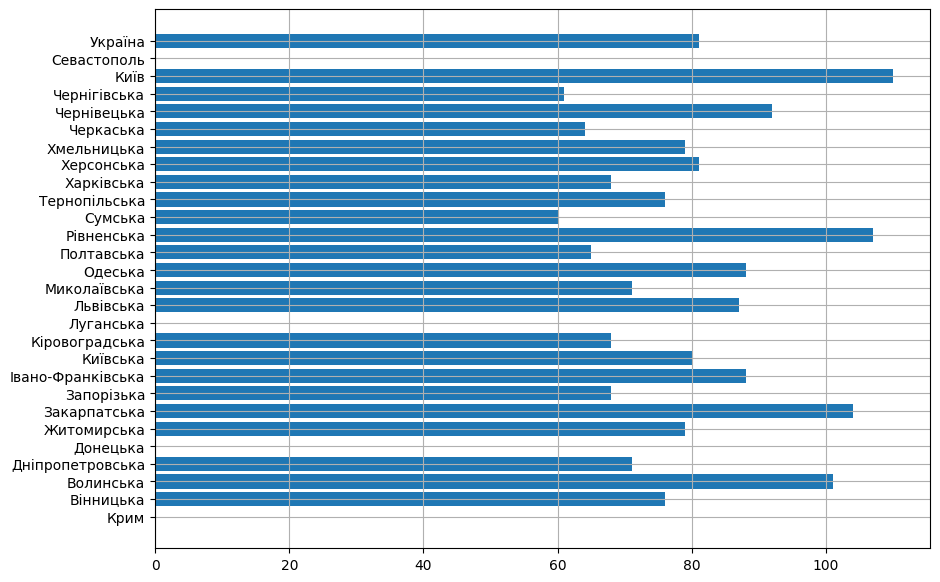

<class 'numpy.ndarray'>


In [49]:
#Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році
markers_x = pd_numeric['2019'].fillna(0).astype(int).values.tolist()
markers_y_2 = pd_numeric['Регіон'].to_numpy()
plt.figure(figsize = (10,7), frameon = False)
plt.grid()
plt.barh(markers_y_2, markers_x)
plt.show()
print(type(markers_y_2))